Objective of Project:
    1) Building a multiple Regression model to see which model is having high accuracy as the given data is continuous data.
    2) Have to predict the rings of each abalone which will lead us to the age of that abalone.(+1.5 gives the age in years)

Importing required libraries for this project.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


There are 4177 rows and 9 columns in the dataset and and data looks cleaned but still need to check missing values is exist or not and also we have 1 category column SEX in feature 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Adding 1.5 to the rings and converting the rings into ages in years and changing the target variable name into "ages".

In [4]:
df['ages'] = df['Rings']+1.5
df = df.drop(columns= ['Rings'], axis = 1)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,ages
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Converting the categorical data to numeric data using replace () function.

In [6]:
df['Sex']= df['Sex'].replace({'M':0 , 'F':1, 'I': 2})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   ages            4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [8]:
df.describe()   ## briefly describing the dataset.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,ages
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Checking the data whether any missing values are there or not.

In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
ages              0
dtype: int64

We will see how the data is distributed in feature variables (X) and target variable (Y) through various visualization techniques whether data is skewed or not.

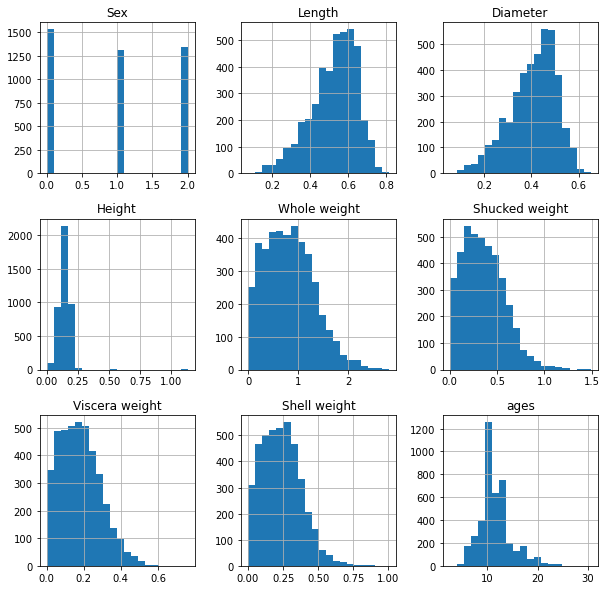

In [10]:
df.hist(bins = 20, figsize = (10,10))
plt.show()

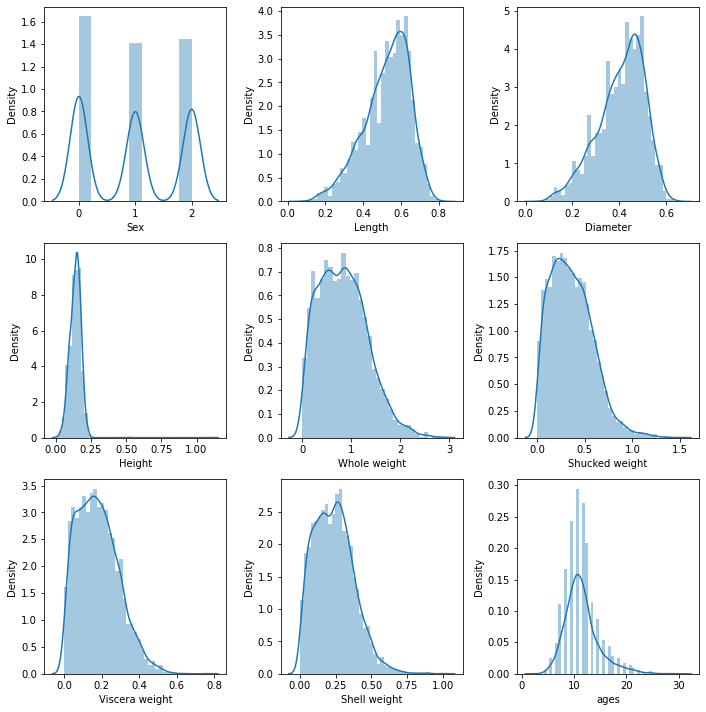

In [11]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=9:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

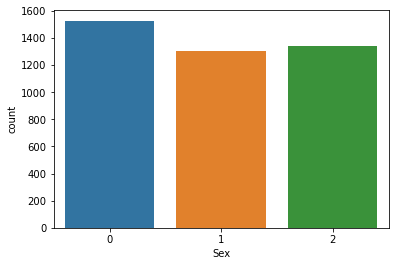

In [12]:
sns.countplot(df['Sex'])
plt.show()

Separating the categorical data  and continuous data to check outliers.

In [16]:
df_cat = df['Sex']
df_cat

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

In [11]:
df_cont = df[df.columns[1:9]]
df_cont

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,ages
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [12]:
df_cont.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,ages
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


We can check outliers exist or not using boxplot and can see there are some outliers exist in data.

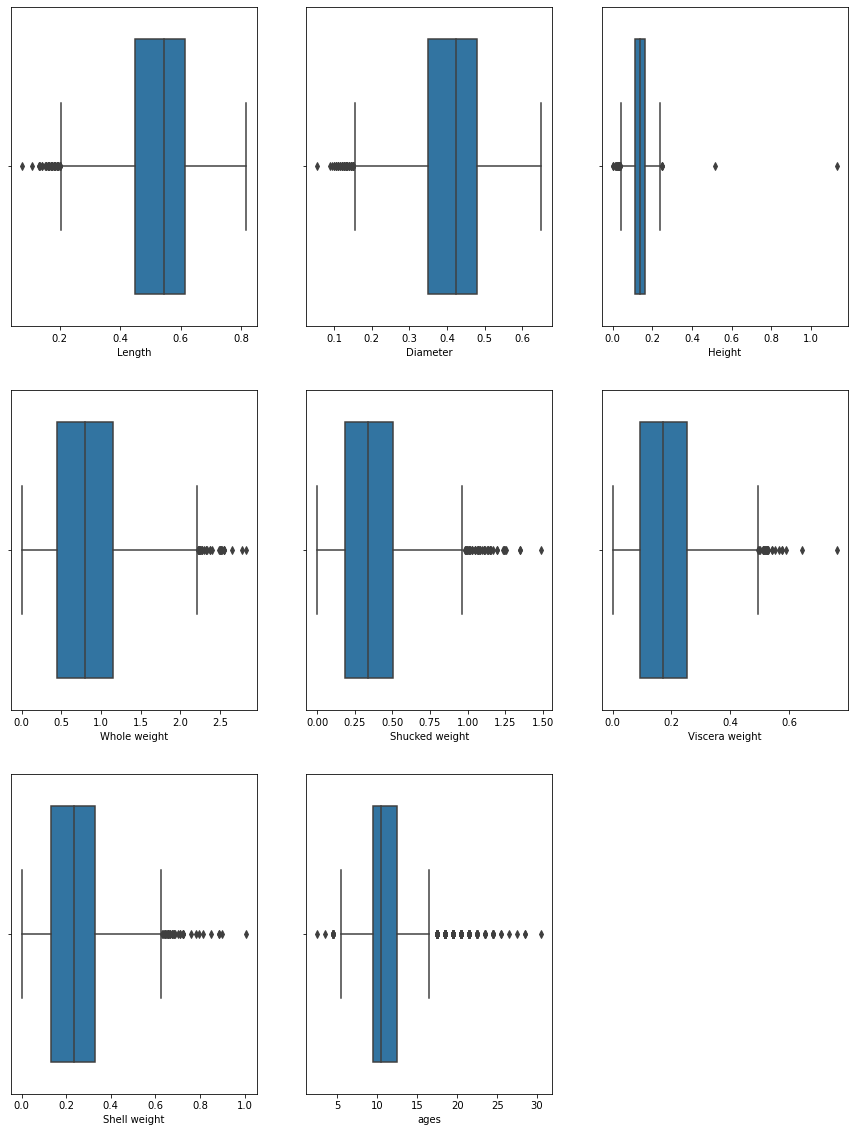

In [16]:
plt.figure(figsize=(15,20))
graph=1

for col in df_cont:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(df_cont[col],orient ='v')
        plt.xlabel(col,fontsize=10)
    graph+=1
plt.show()

Applying outlier removal method - Z-Score Method to remove the outliers.

In [13]:
from scipy.stats import zscore

z = np.abs(zscore(df_cont))
threshold = 3
df_new = df_cont[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",df_cont.shape)
print("shape after" .ljust(20),":",df_new.shape)
print("% loss" .ljust(20),":",((df_cont.shape[0]-df_new.shape[0])/df_cont.shape[0])*100)

shape before and after
shape before         : (4177, 8)
shape after          : (4027, 8)
% loss               : 3.5910940866650707


The % loss of data is 3% after applying outlier.

In [14]:
df_new.isna().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
ages              0
dtype: int64

We can see outlier has been removed and range of graph has been changed from the below graph.

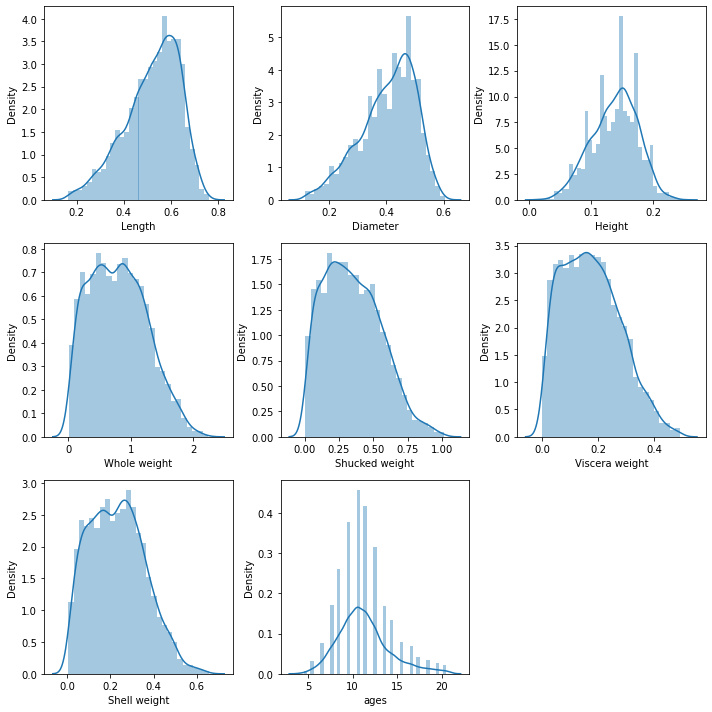

In [19]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df_new:
    if pltnumber<=9:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

Next I want to see the correlation between variables through correlation table and for much understanding,I used Heat Map for easy visulaize and understanding.

In [22]:
corr = df.corr()  
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,ages
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
ages,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


As I can see that most features are correlated to other variable but it's likely that these variables are important features to predict the ages of abalone so we will check that later.

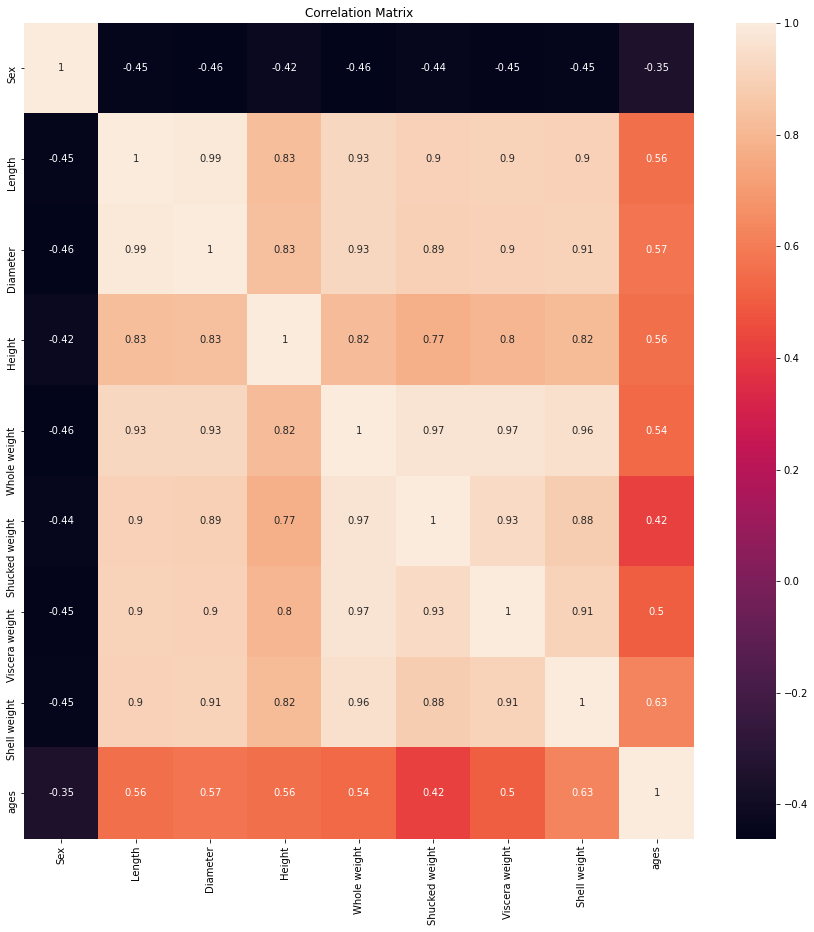

In [24]:
plt.figure(figsize= (15,15))
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")
plt.show()

Concatenate the categorical data and continuous data

In [17]:
x = pd.concat([df_cat,df_new], axis =1)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,ages
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [18]:
x = x.dropna()
x= x.reset_index(drop= True)

In [19]:
x.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
ages              0
dtype: int64

In [28]:
x.shape

(4027, 9)

Splitting the feature (X) and target (Y) variable

In [20]:
X = x.drop(columns = ['ages'])
Y = x['ages']

In [21]:
Y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4022    12.5
4023    11.5
4024    10.5
4025    11.5
4026    13.5
Name: ages, Length: 4027, dtype: float64

Before preparing the data for modelling,I am standardizing the data and it will convert the data into a standardize form in order to equalize the range of data

In [22]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

Splitting the train data and test data

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,Y, test_size = 0.25, random_state = 315)

Model Building - I am building models on these algorithm -  1) support vector Regressor 2) Decision tree Regressor 3) Random forest Regressor 4)K Neighbors Regressor 5) Liner Regression to compare the accuracy.

In [ ]:
Model 1 : Support Vector Regressor

In [24]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Train Data score:" , svm.score(x_train,y_train))
print("Test Data score:" ,  svm.score(x_test,y_test))

Train Data score: 0.5550545801641187
Test Data score: 0.5294531763242849


Model 2 : Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Train Data score:" , dt.score(x_train,y_train))
print("Test Data score:" ,  dt.score(x_test,y_test))

Train Data score: 1.0
Test Data score: 0.11431748724693436


Model 3 :Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(x_train,y_train)
y_pred = lin.predict(x_test)
print("Train Data score:" , lin.score(x_train,y_train))
print("Test Data score:" ,  lin.score(x_test,y_test))

Train Data score: 0.5283899420286122
Test Data score: 0.5004221979053728


Model 4 : Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
print("Train Data score:" , rfr.score(x_train,y_train))
print("Test Data score:" ,  rfr.score(x_test,y_test))

Train Data score: 0.9352758643752056
Test Data score: 0.53283042594567


In [ ]:
Model 5 :K Neighbors Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Train Data score:" , knn.score(x_train,y_train))
print("Test Data score:" ,  knn.score(x_test,y_test))

Train Data score: 0.7186924272676556
Test Data score: 0.43652538414189135


Applying cv score to check whether model is over fitting or not

In [30]:
from sklearn.model_selection import cross_val_score

scr_svm = cross_val_score(svm,x_sc,Y,cv=5)
print("CV Score of SVM :", scr_svm.mean())

CV Score of SVM : 0.4983402422168588


In [33]:
scr_dt = cross_val_score(dt,x_sc,Y,cv=5)
print("CV Score of DT :", scr_dt.mean())

CV Score of DT : -0.05605407682120274


In [57]:
scr_rfr = cross_val_score(rfr,x_sc,Y,cv=5)
print("CV Score of RFR :", scr_rfr.mean())

CV Score of RFR : 0.4590224074861801


In [36]:
scr_lin = cross_val_score(lin,x_sc,Y,cv=5)
print("CV Score of linear :", scr_lin.mean())

CV Score of ABC : 0.4318814521080143


In [37]:
scr_knn = cross_val_score(knn,x_sc,Y,cv=5)
print("CV Score of knn :", scr_knn.mean())

CV Score of knn : 0.3479713232913361


Applying  Grid search CV for tuning the hyper parameter to check whether the accuracy score is increasing or not

In [51]:
param = {'n_estimators' : [5,6,7,8,9,10,12,14] ,'max_depth': [4,8,12,16,20],'criterion' : ['mse'],
             'min_samples_leaf' : [2,4,6,8,10], 'min_samples_split' : [3,6,9,12,15] }

In [52]:
g_search = GridSearchCV(rfr,param_grid = param, cv=5)

In [53]:
g_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [4, 8, 12, 16, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [3, 6, 9, 12, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 12, 14]})

In [54]:
g_search.best_params_

{'criterion': 'mse',
 'max_depth': 16,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 14}

In [55]:
final = RandomForestRegressor(criterion = 'mse',max_depth =16,min_samples_leaf = 10,min_samples_split = 15,n_estimators= 14)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("Train data:RFR-" , final.score(x_train,y_train))
print("Test data:RFR-" , final.score(x_test,y_test))

Train data:RFR- 0.6838516644637287
Test data:RFR- 0.5371657661389877


WE can see that our model has increased the accuracy.

In [56]:
import joblib
joblib.dump(final,"abalone.pkl")

['abalone.pkl']